# SciComp Exam 2018

In [1]:
#Libraries
from numpy import pi, sin, cos, linspace, arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,title,legend
from scipy.integrate import odeint
from scipy.optimize import curve_fit,fsolve
from scipy.interpolate import interp1d
from newtonRaphson import *
#


## Question 1
### i)

$Let \ q = \theta_1 \\ Let \ w = \dot{\theta_1} \\ Let \ e = \theta_2 \\ Let \ r = \dot{\theta_2} \\ $

Using this new set of variables we can write the two second order differential equations as a set of four coupled first order differential equations

$ \dot{q} = \dot{\theta_1} = w \\  \dot{w} = \ddot{\theta_1} = \beta sin(\theta_2 - \theta_1) - b\dot{\theta_1} = \beta sin(e - q) - bw\\ 
  \dot{e} = \dot{\theta_2} = r \\  \dot{r} = \ddot{\theta_2} = \beta sin(\theta_1 - \theta_2) - b\dot{\theta_2} = \beta sin(q -e) - br\\ \\ $
  
  Simplifying these gives our set of four differential equations

$ (1)\ \dot{q} = w \\ (2)\  \dot{w} = \beta sin(e - q) - bw\\ 
  (3)\ \dot{e} = r \\  (4)\  \dot{r} = \beta sin(q -e) - br\\ $


### ii)

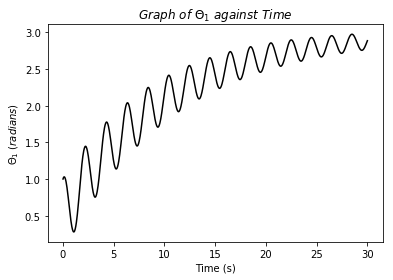

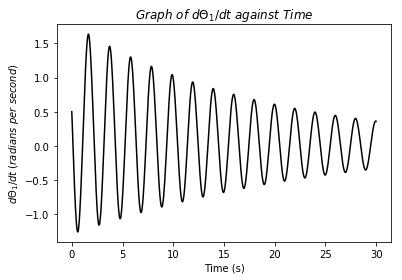

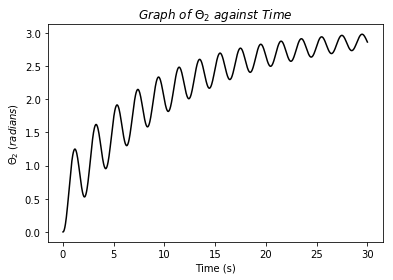

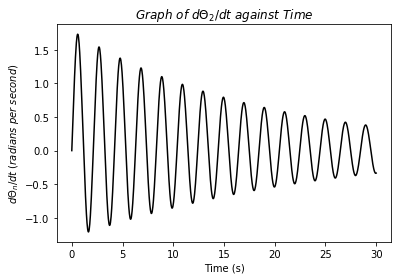

In [2]:
b = 0.1 # Defining the constant b
B = 5.0 # Defining the constant Beta

#Defining the system of first order differential equations described in part 1(i)
def L(y, x):
    q,w,e,r = y            #Relate the new variables to the integration variable 
    Q = w                  #Define equation 1 ( note that the capital letter represents the derivative of that variable)
    W = B*sin(e-q) - b*w   #Define equation 2
    E = r                  #Define equation 3
    R = B*sin(q-e) - b*r   #Define equation 4
    return Q,W,E,R         #Return a list of each of the derivative variables

#Computation
t = linspace(0,30,1000)                                         #Set the pseudo-smooth t-range 
y  = odeint(L,[1.,0.5,0.,0.],t)                                 #Use Scipy's Ordinary Differential Equation integrater to solve
                                                                #the equation for each value of x
for i in [0,1,2,3]:                                             #For each of the graphs that needs plotting 
    plot(t,y[:,i], "k-")                                        #Plot the corresponding solution against t
    title(["$Graph \ of \ \Theta_1 \ against \ Time$",          
           "$Graph \ of \ d\Theta_1/dt \ against \ Time$",
           "$Graph \ of \ \Theta_2 \ against \ Time$",
           "$Graph \ of \ d\Theta_2/dt \ against \ Time$"][i])#This array picks the correct title for the graph being plotted 
    ylabel(["$\Theta_1 \ (radians)$",
           "$d\Theta_1/dt \ (radians \ per \ second)$",
           "$\Theta_2 \ (radians)$",
           "$d\Theta_n/dt \ (radians \ per \ second)$"][i])   #This array picks the correct ylabel for the graph being plotted 
    xlabel("Time (s)")
    show() #Output the graph

Using these graphs we can confirm that the angular velocity ($\dot{\theta_n}$) of both rotors does match the description given by the question ("Velocity-Dependent damping"). This means that the rotors must be losing energy to the external system.


the graphs of $\theta_n$ also show that over time they stop tend towards a rest position, over a longer period of $t$ you see that both of these rotors tend to an angular displacement of 3 rad. This value remains nearly constant because the angular velocity is tending toward zero.


We also see that the amplitude of the oscillation is damped as well.

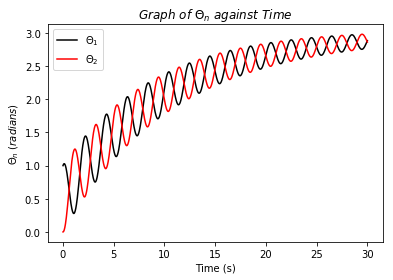

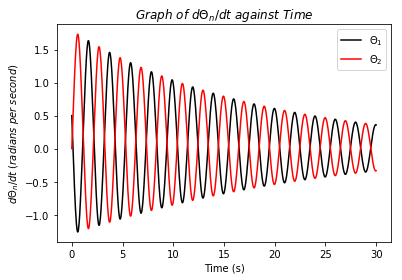

In [3]:
for i in [0,1]:                                             #For each of the graphs that needs plotting 
    plot(t, y[:,i  ],"k-", label = "$\Theta_1$")
    plot(t, y[:,i+2],"r-", label = "$\Theta_2$")            #Plot the corresponding solution against t
    title(["$Graph \ of \ \Theta_n \ against \ Time$",
           "$Graph \ of \ d\Theta_n/dt \ against \ Time$"][i])#This array picks the correct title for the graph being plotted 
    ylabel(["$\Theta_n \ (radians)$",
           "$d\Theta_n/dt \ (radians \ per \ second)$"][i])   #This array picks the correct ylabel for the graph being plotted 
    xlabel("Time (s)")
    legend()
    show() #Output the graph

## Question 2
### i)

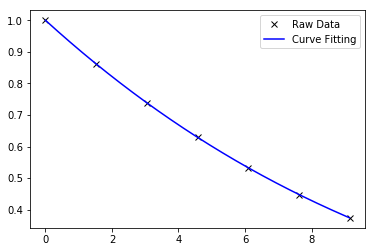

when h = 2; rho = 0.82177
when h = 4; rho = 0.66884
when h = 8; rho = 0.42897


In [4]:
#Define The High Order Polynomial with unknown coefficients
def cubicF(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
#

#Define Raw data
x = [0.,1.525 ,3.050 ,4.575 ,6.10  ,7.625 ,9.150]
y = [1.,0.8617,0.7385,0.6292,0.5328,0.4481,0.3741]
#

#Interpolation
x0 = arange(0,9.150,0.01) #Define a pseudo-smooth x-range
Coe, Cov = curve_fit(cubicF,x,y)             #Use Curve_fit to create a single cubic polynomial function
#

#Graph Plot
plot(x,y,'kx',label ="Raw Data") # Plot raw data 
plot(x0,cubicF(x0,Coe[0],Coe[1],Coe[2],Coe[3]),'b-',label ="Curve Fitting") # Plot polyomial fit
legend()
show()
#

#Output
for h in [2,4,8]:
    print("when h = " + str(h) + "; rho = {:.5f}".format(cubicF(h,Coe[0],Coe[1],Coe[2],Coe[3])))
#


### ii)

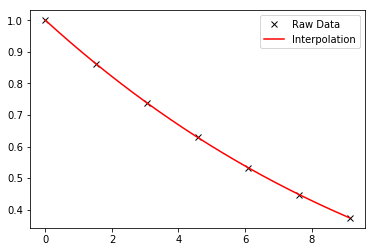

Using the cubic spline gives a value of 0.82177 for h = 2
Using the cubic spline gives a value of 0.66884 for h = 4
Using the cubic spline gives a value of 0.42894 for h = 8


In [5]:
#Define Raw data
x = [0.,1.525 ,3.050 ,4.575 ,6.10  ,7.625 ,9.150]
y = [1.,0.8617,0.7385,0.6292,0.5328,0.4481,0.3741]
#

#Interpolation
x0 = arange(0,9.150,0.01) #Define a pseudo-smooth x-range
interpolate  = interp1d(x,y, kind = 'cubic') #Use interp1d to create a function of cubic splines
#

#Graph Plot
plot(x,y,'kx',label ="Raw Data") #plot raw data 
plot(x0,interpolate(x0),'r-',label ="Interpolation") # plot cubic splines
legend()
show()
#

#Output
for i in [2,4,8]:
     print ("Using the cubic spline gives a value of {:.5f}".format(float(interpolate(i))) + 
            " for h = " + str(i))
#


### iii)

In [6]:
#Define The High Order Polynomial with unknown coefficients
def cubicF(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
#

#Define Raw data
x = [0.,1.525 ,3.050 ,4.575 ,6.10  ,7.625 ,9.150 ]
y = [1.,0.8617,0.7385,0.6292,0.5328,0.4481,0.3741]
#

#Interpolation
x0 = arange(0,9.150,0.01) #Define a pseudo-smooth x-range
interpolate  = interp1d(x,y, kind = 'cubic') #Use interp1d to create a function of cubic splines
Coe, Cov = curve_fit(cubicF,x,y)             #Use Curve_fit to create a single cubic polynomial function
#

#OUTPUT
print("We find that if rho = 0.67 when h = 4, the error on the fitting functions is:")
print("")
print("Polynomial Fit: Relative error is {:.4f}%".format(abs(100*0.67/interpolate(4)-100)))
print("Cubic Splines : Relative error is {:.4f}%".format(abs(100*0.67/cubicF(4,Coe[0],Coe[1],Coe[2],Coe[3])-100)))
print("")
print("Polynomial Fit: Absolute error is {:.3e}".format(abs(interpolate(4)-0.67)))
print("Cubic Splines : Absolute error is {:.3e}".format(abs(cubicF(4,Coe[0],Coe[1],Coe[2],Coe[3])-0.67)))
#

We find that if rho = 0.67 when h = 4, the error on the fitting functions is:

Polynomial Fit: Relative error is 0.1733%
Cubic Splines : Relative error is 0.1729%

Polynomial Fit: Absolute error is 1.159e-03
Cubic Splines : Absolute error is 1.157e-03


## Question 3
### i)

To describe the system in which the tank is 75% full we must consider the ratio between the partially full tank and the completely full tank

$$
let: \ \phi = cos^{-1}(1-\frac{h}{r}) \\ 
\\
V = r^2L(\phi - (1-\frac{h}{r})sin(\phi)) \\ 
\Rightarrow V = r^2L(\phi - cos\phi sin\phi ) \\
$$

When the tank is full we find that its volume is: 
$
V_f = \pi r^2 L\\
$

Using this to find our ratio we get: 

$$
\frac{V}{V_f} = \frac{ r^2L(\phi - cos\phi sin\phi )}{\pi r^2 L} \\
\Rightarrow \frac{V}{V_f} = \frac{1}{\pi}(\phi - cos\phi sin\phi ) \\
$$

We know that our relative Volume is 3/4 so using this we can find an expression for $\phi$ which is equivalent to zero and we can convert into a measurement of $\frac{h}{r}$ using the equation $$
$$$$$$$$$$$$$$
$\therefore$ To solve for $\frac{h}{r}$ we need to solve the equation: 
$$
\frac{1}{\pi}(\phi - cos\phi sin\phi ) -\frac{3}{4} = 0 \\
$$
for $\phi$ then convert it into $\frac{h}{r}$ using: 
$$
\frac{h}{r} = 1 - cos\phi \\
$$

In [7]:
def f(O): #Define the function that needs to be solved (O is supposed to slightly resemble a phi)
    return (O - cos(O)*sin(O))/pi - 0.75

phi = fsolve(f,1)[0] #Use Scipy's Function Solver to find the solution of phi

print ("The value of h/r when the tank is 75% full is {:.3f}".format(1-cos(phi)))
                                                #Then output h/r by converting the value obtain

The value of h/r when the tank is 75% full is 1.404



### ii)

In [8]:
#The Newton Raphson method requires the function and it's derivative with respect to the requested root variable
def f(x): #Defines Equation (5) with respect to x
    return sin(x) + 3*cos(x) - 2
def df(x): # Defines the derivative of Equation (5) with respect to x
    return cos(x) - 3*sin(x)
def g(x): #Since Equation (6) is dependant on two variables I use a g(x) to return Equation (6) for any chosen x value
    def _g(y):
        return cos(x) - sin(y) + 0.2
    return _g
def dg(y): #The derivative of Equation (6) with respect to y has no dependancies on x so the nested subroutines aren't required
    return -cos(y)

xroot = newtonRaphson(f,df,0,2) #Use Newton Raphson to calculate the correct root of x
print ("the correct solution of x is {:.3f}".format(xroot)) #Output the found root

yroot = newtonRaphson(g(xroot),dg,0,2) #Use Newton Raphson to calculate the correct root of y
                        #notice that the function passed is specifically requestion the version of Eq (6)
                        #where x is the calculated root rather than the given value.
print ("the correct solution of y is {:.3f}".format(yroot))#Output the found root
print("")
print("")
print("So the accurate solutions of these equations lies at ({:.3f}".format(xroot) + ", {:.3f})".format(yroot))
                            #Formally output the correct solution location

the correct solution of x is 1.208
the correct solution of y is 0.588


So the accurate solutions of these equations lies at (1.208, 0.588)
